In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify 
import seaborn as sns
%matplotlib inline

In [2]:
gds = pd.read_csv('dataset.csv', encoding='utf-8')

In [3]:
gds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 60.6+ KB


## Таблица PS4 Games Sales

Датасет можно найти [тут](https://www.kaggle.com/sidtwr/videogames-sales-dataset?select=PS4_GamesSales.csv)

In [4]:
gds.head(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [5]:
gds.Genre.unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Misc', 'Platform', 'Racing', 'Fighting', 'Adventure', 'MMO',
       'Simulation', 'Music', 'Party', 'Strategy', 'Puzzle',
       'Visual Novel'], dtype=object)

## Гипотезы:
- Самый многочисленный жанр - Action
- Игры от Activision продаются лучше игр от Sony Interactive Entertainment
- Больше всего шутеров было выпущено в 2016 году

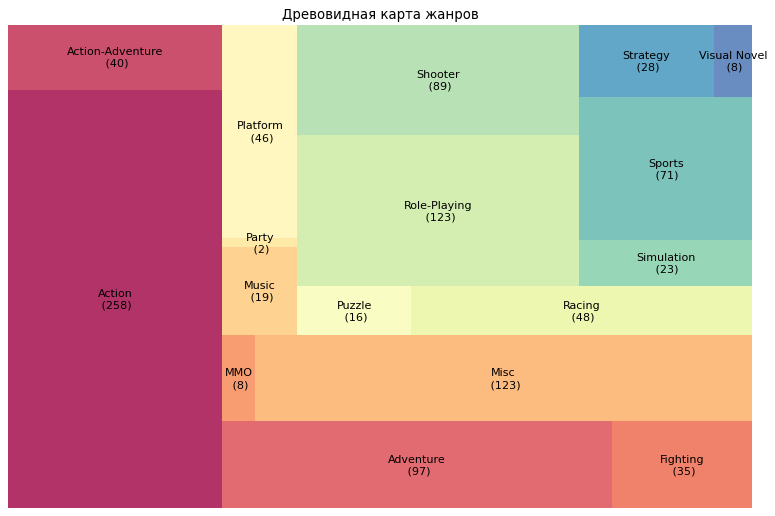

In [6]:
tree = gds.groupby('Genre').size().reset_index(name='counts')
labels = tree.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = tree['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.title('Древовидная карта жанров')
plt.axis('off')
plt.show()

Больше всего было выпущено игр в жанре Action, затем РПГ и Разное

In [7]:
gds.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

У 209 игр не указаны год выпуска и издатель

In [8]:
gds.groupby('Publisher')['Global'].sum().reset_index().sort_values(by=['Global'],ascending=False).head()

,Publisher,Global
8,Activision,72.44
142,Ubisoft,59.16
42,Electronic Arts,54.96
115,Sony Interactive Entertainment,54.85
41,EA Sports,47.55


Activision продала больше всего копий своих игр

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C8435C8>,
      dtype=object)

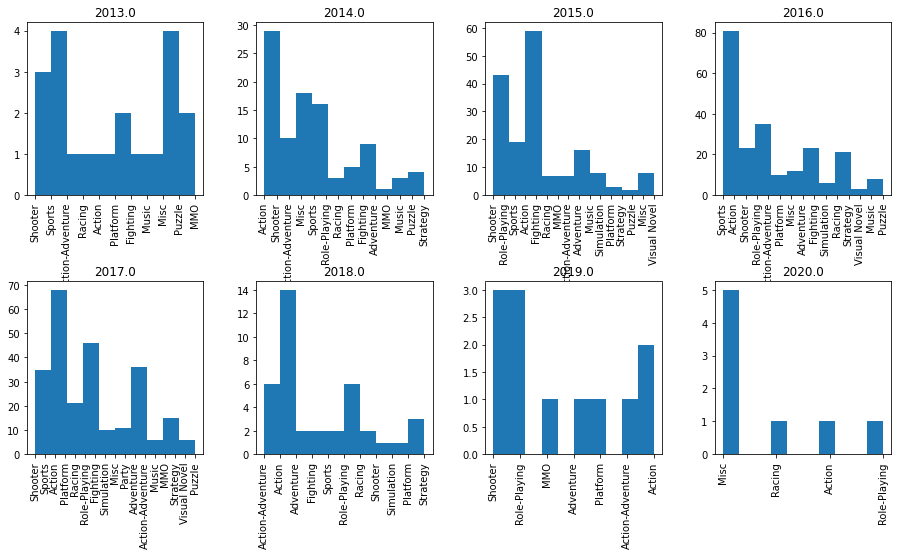

In [9]:
gds.hist('Genre', bins=10, by = ['Year'], layout=[2,4],figsize = [15, 8])

Больше всего шутеров было выпущено в 2015 году

Далее мы проанализируем характерные жанры для нескольких известных издателей, тем самым нормализовав данные

In [10]:
def PubInf(gdsPub, lim, publisher):
    x_var = 'Genre'
    groupby_var = 'Year'
    gds_agg = gdsPub.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [gdsPub[x_var].values.tolist() for i, gdsPub in gds_agg]

    plt.figure(figsize=(16,9), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, gdsPub[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

    plt.legend({group:col for group, col in zip(np.unique(gdsPub[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Гистограмма по жанрам издателя ${publisher}$", fontsize=22)
    plt.xlabel(x_var)
    plt.ylabel("Количество тайтлов")
    plt.ylim(0, lim)
    plt.xticks(ticks=bins, labels=np.unique(gdsPub[x_var]).tolist(), rotation=90, horizontalalignment='left')
    plt.show()

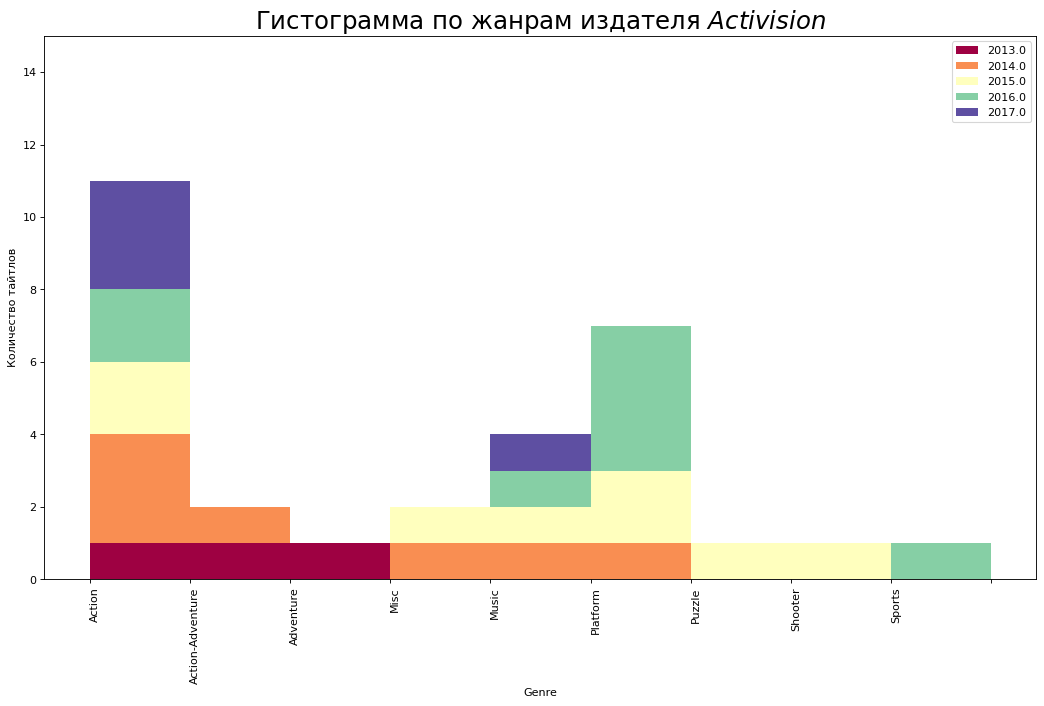

In [11]:
act = gds[gds.Publisher == 'Activision']
PubInf(act, 15, 'Activision')

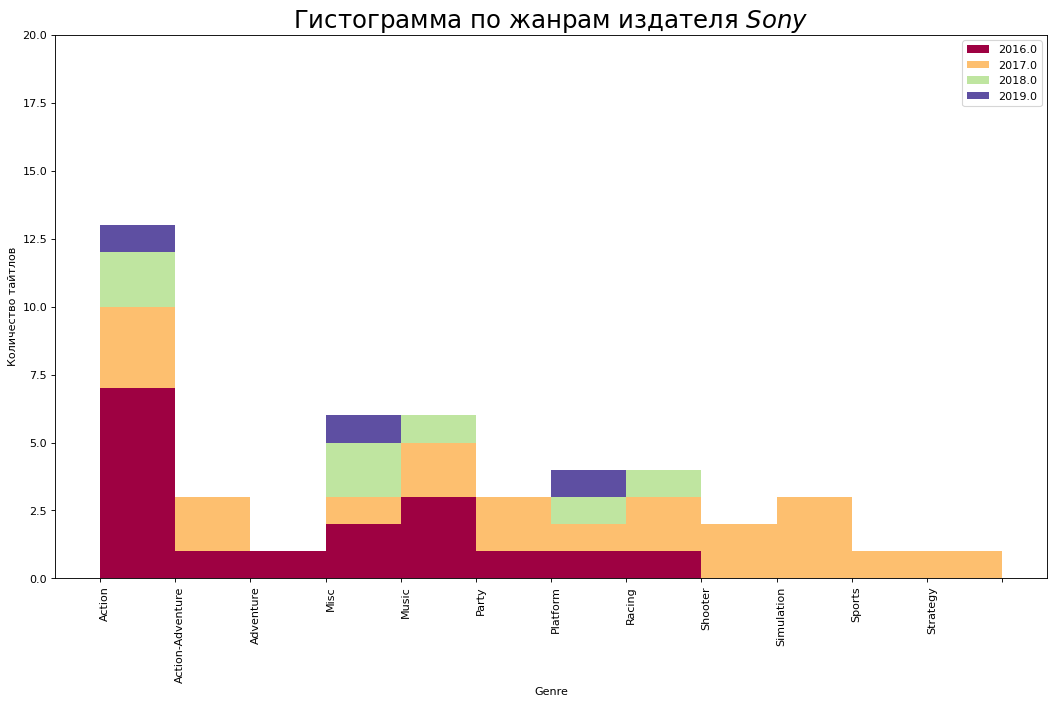

In [12]:
sony = gds[gds.Publisher == 'Sony Interactive Entertainment']
PubInf(sony, 20, 'Sony')

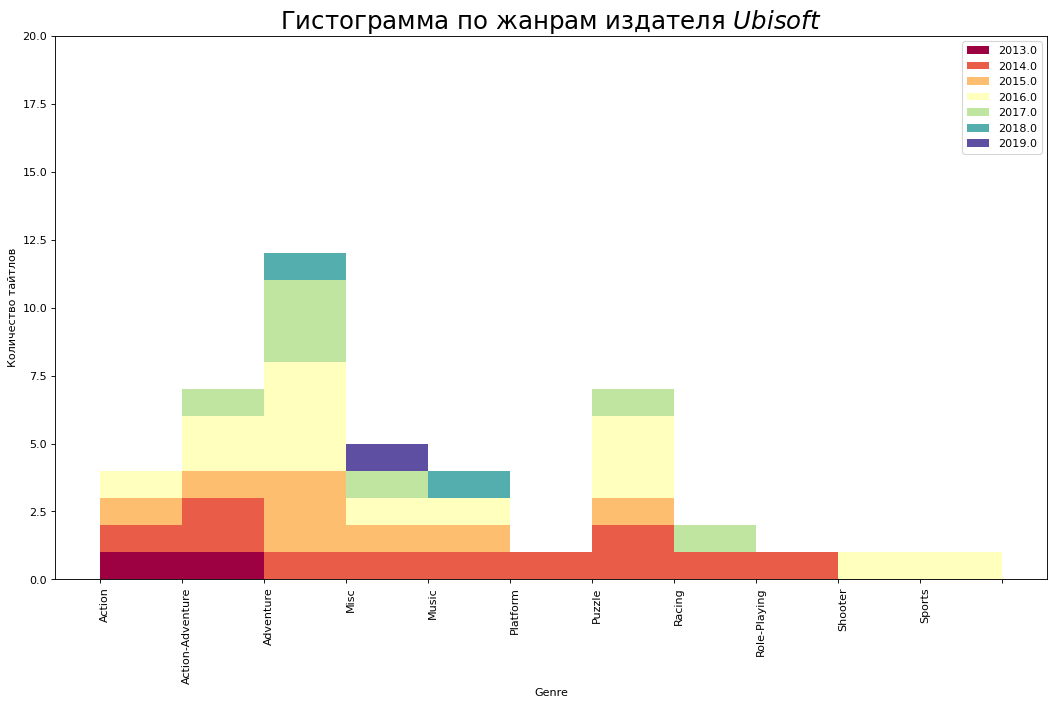

In [13]:
ubi = gds[gds.Publisher == 'Ubisoft']
PubInf(ubi, 20,'Ubisoft')

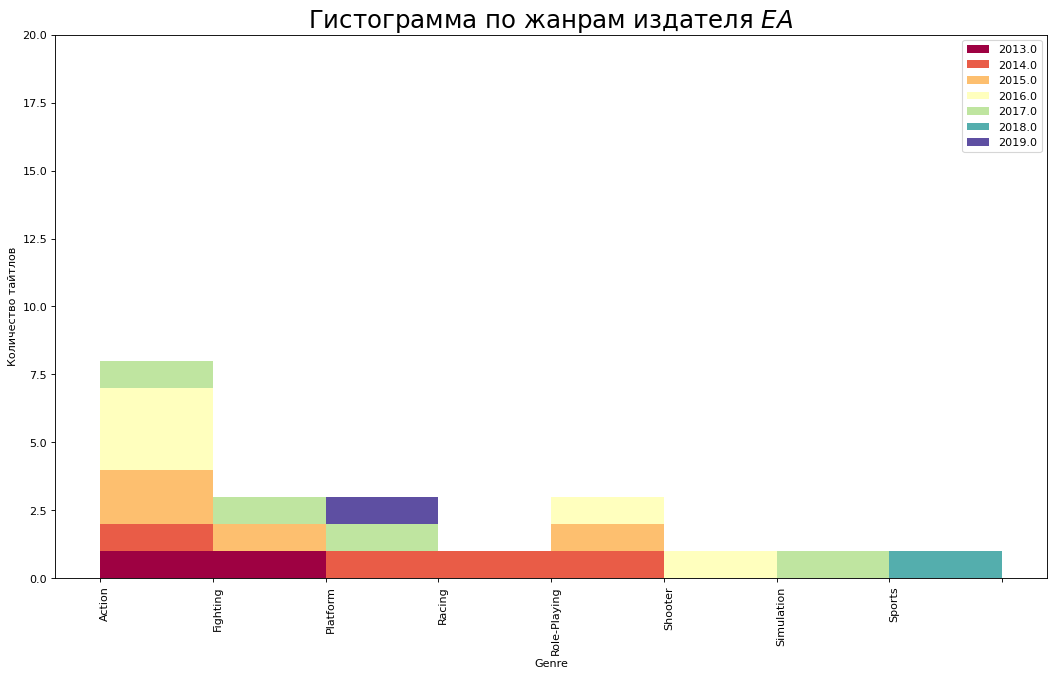

In [14]:
ea = gds[gds.Publisher == 'Electronic Arts']
PubInf(ea, 20,'EA')

В качестве дополнительного материала использовалась статья "50 оттенков matplotlib" - https://habr.com/ru/post/468295/